> ## **Analysing Airfoil Self-Noise Data Set to Predict Scaled Sound Pressure Level,in decibels,through Linear Regression & Random Forrest Regressor Model & Analysing their Performance.** <br>
>> ### ***By - Saif Ali Ahmad***<br><br>
*Data Set Information*:<br><br>
NASA data set, obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel.<br><br>
*Attribute Information*:<br><br>
This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.<br><br>
*The only output is*:
6. Scaled sound pressure level, in decibels.<br><br>

> **URL for Data Set** - https://archive.ics.uci.edu/ml/datasets/airfoil+self-noise



In [ ]:
#Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Defining Column Names
Columns = ['Frequency','Angle of attack','Chord length','stream velocity',
           'Suction side displacement','Sound pressure level' ]

In [ ]:
# Reading & Displaying Data Set
airfoil_df = pd.read_csv('/content/drive/MyDrive/Data Science/Airfoil/airfoil.tsv',sep='\t',names=Columns)
print('Shape of Data = ',airfoil_df.shape)
airfoil_df.head(10)

Shape of Data =  (1503, 6)


,Frequency,Angle of attack,Chord length,stream velocity,Suction side displacement,Sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
5,2500,0.0,0.3048,71.3,0.002663,125.571
6,3150,0.0,0.3048,71.3,0.002663,125.201
7,4000,0.0,0.3048,71.3,0.002663,123.061
8,5000,0.0,0.3048,71.3,0.002663,121.301
9,6300,0.0,0.3048,71.3,0.002663,119.541


### Exploring The Dataset

In [ ]:
# Checking for Missisng Values
airfoil_df.isna().any()

Frequency                    False
Angle of attack              False
Chord length                 False
stream velocity              False
Suction side displacement    False
Sound pressure level         False
dtype: bool

In [ ]:
# Checking Data Types of attributes
airfoil_df.dtypes

Frequency                      int64
Angle of attack              float64
Chord length                 float64
stream velocity              float64
Suction side displacement    float64
Sound pressure level         float64
dtype: object

In [ ]:
# Using info() function
airfoil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Frequency                  1503 non-null   int64  
 1   Angle of attack            1503 non-null   float64
 2   Chord length               1503 non-null   float64
 3   stream velocity            1503 non-null   float64
 4   Suction side displacement  1503 non-null   float64
 5   Sound pressure level       1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [ ]:
airfoil_df.columns

Index(['Frequency', 'Angle of attack', 'Chord length', 'stream velocity',
       'Suction side displacement', 'Sound pressure level'],
      dtype='object')

***Defining function for displaying Dist Plots***

In [ ]:
# Function For Displaying Dist Plot
def dist_plot(dataframe,column,ax):
    
    dataframe[column].plot(kind='kde', ax=ax)
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')
    

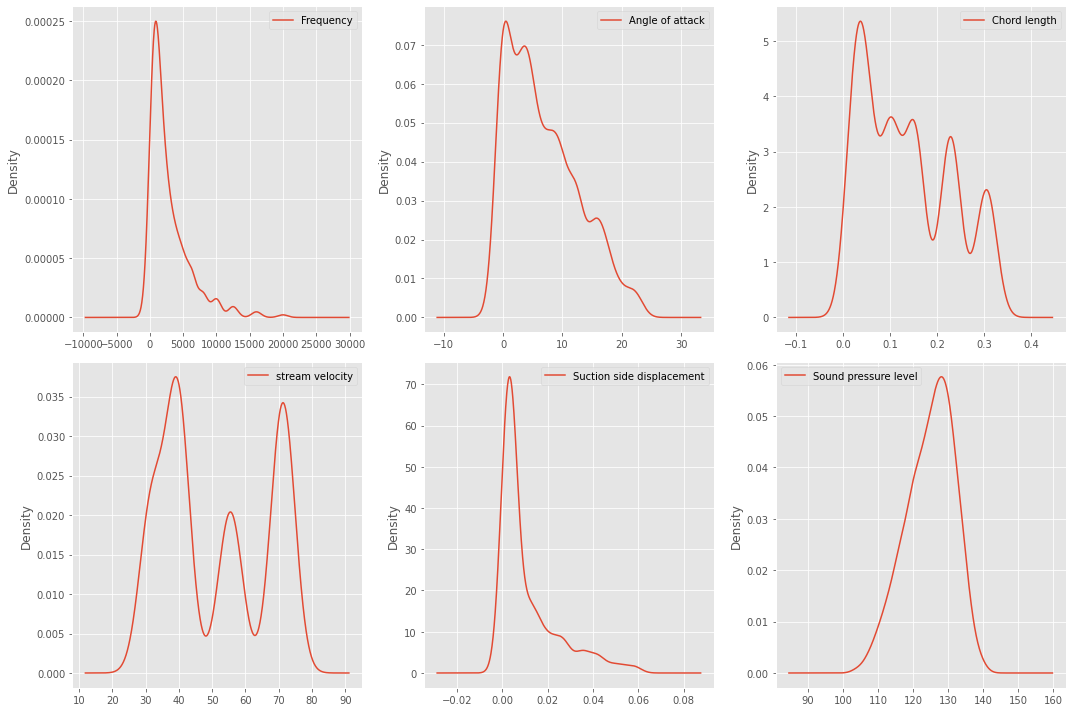

In [ ]:
fig,axis  = plt.subplots(nrows=2,ncols=3,figsize=(15,10))
col_list = list(airfoil_df.columns)
col_no = 0
for row in range(0,2):
    for col in range(0,3):
        dist_plot(airfoil_df,col_list[col_no],axis[row][col])
        col_no+=1
plt.tight_layout()

In [ ]:
# using Describe Function
airfoil_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Frequency,1503.0,2886.380572,3152.573137,200.000000,800.000000,1600.000000,4000.000000,20000.000000
Angle of attack,1503.0,6.782302,5.918128,0.000000,2.000000,5.400000,9.900000,22.200000
Chord length,1503.0,0.136548,0.093541,0.025400,0.050800,0.101600,0.228600,0.304800
stream velocity,1503.0,50.860745,15.572784,31.700000,39.600000,39.600000,71.300000,71.300000
Suction side displacement,1503.0,0.011140,0.013150,0.000401,0.002535,0.004957,0.015576,0.058411
Sound pressure level,1503.0,124.835943,6.898657,103.380000,120.191000,125.721000,129.995500,140.987000


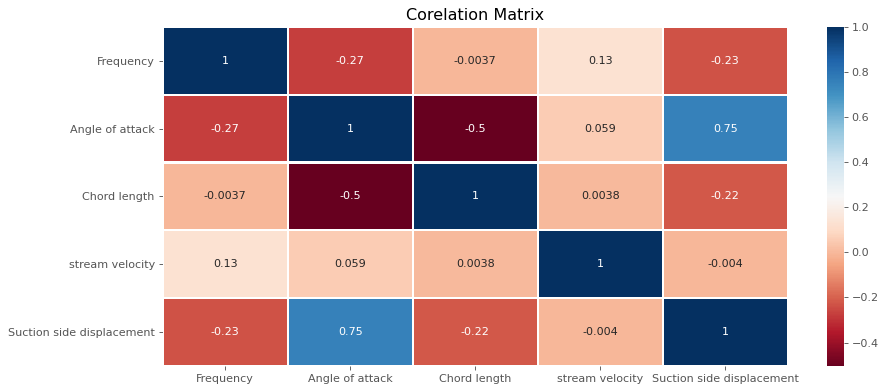

In [ ]:
# Finding the Corelation
corr = airfoil_df.drop(columns='Sound pressure level').corr()

#Plotting the Corelation Matrix
f , ax = plt.subplots(figsize=(12,5),dpi=80)
sns.heatmap(corr,ax=ax,annot=True,cmap='RdBu',linecolor='white',linewidths='1')
ax.set_title('Corelation Matrix')
plt.tight_layout()

In [ ]:
# Slicing Data Set and Printing Output Column
airfoil_df.iloc[:,-1]

0       126.201
1       125.201
2       125.951
3       127.591
4       127.461
         ...   
1498    110.264
1499    109.254
1500    106.604
1501    106.224
1502    104.204
Name: Sound pressure level, Length: 1503, dtype: float64

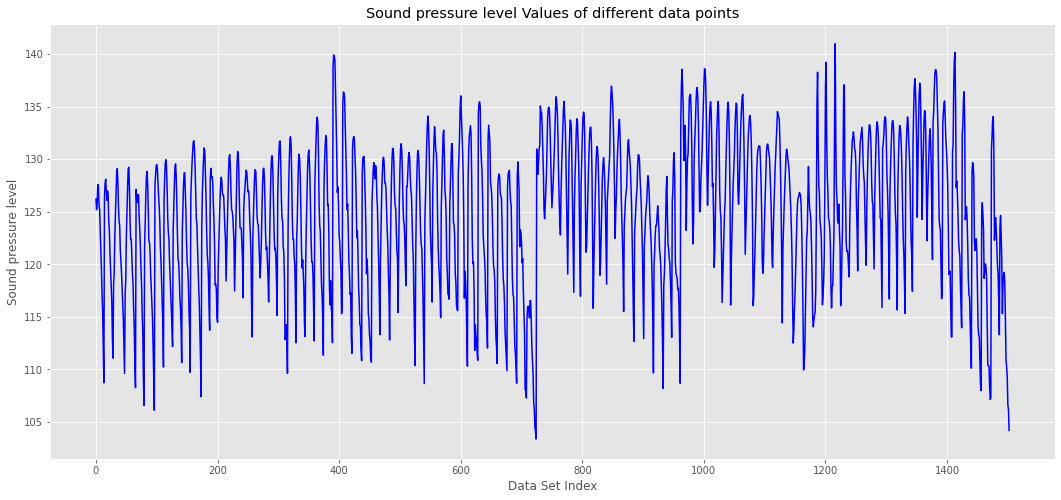

In [ ]:
# Printing The Output Values i.e Sound pressure level

x_val  = airfoil_df.index
y_val  = airfoil_df['Sound pressure level'].values

fig ,axis = plt.subplots(nrows=1,ncols=1,figsize=(18,8))

axis.plot(x_val,y_val,'b')
plt.xlabel('Data Set Index')
plt.ylabel('Sound pressure level')
plt.title('Sound pressure level Values of different data points')
plt.show()

## **Preprocessing The Data Set**

#### ***Defining The Graph Plotting Function***

In [ ]:
# Graph Plotting Funtion for Plotting the Graphs which takes y_test,y_pred,regressor_name as Input

def graph_plotter(y_test,y_pred,regressor_name):
    
    # importing the required libraries
    from sklearn.metrics import r2_score,mean_absolute_error ,mean_squared_error
    
    # Calculating the r2
    r2  = r2_score(y_test,y_pred)
    # Calculating the Mean Absulute Error
    mae = mean_absolute_error(y_test,y_pred)
    # Calculating the Mean Squared Error
    mse = mean_squared_error(y_test,y_pred)
    
    #Calculating the min and max value of y_test,y_pred
    min_value = min(y_test.min() , y_pred.min())
    max_value = max(y_test.max() , y_pred.max())
    
    # Plotting the graph
    fig , axis = plt.subplots(nrows=1, ncols=1,figsize = (10,5),dpi=100)
    sns.scatterplot(y_test,y_pred,color='b',label= 'Predicted Values',alpha=0.7)
    axis.plot(y_test,y_test,'k',label= 'Perfect Prediction') #[min_value,max_value],[min_value,max_value]
    axis.set_xlabel('Actual Values Of Sound Pressure Level')
    axis.set_ylabel('Predicted Values Of Sound Pressure Level')
    axis.set_xlim([min_value-1,max_value+1])
    axis.set_ylim([min_value-1,max_value+1])
    axis.set_title('"y_test"  Vs  "y_pred"  plot for '+str(regressor_name))
    style = dict(boxstyle='round', facecolor='0.7', alpha=0.6)
    textStr = '$MAE=%.3f$\n$MSE=%0.3f$\n$R^2=%.3f$' % (mae,mse,r2)
    axis.text(min_value,max_value-12, textStr,fontsize=13, bbox=style)

    plt.legend(facecolor = '0.80')
    plt.tight_layout()


In [ ]:
# Defining Input Variable X & Output Variable y
X = airfoil_df.iloc[:,:-1]
y = airfoil_df.iloc[:,-1]

In [ ]:
# Importing shuffle and train_test_split
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle 

X,y = shuffle(X,y,random_state=1) # shuffling the dataset

X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size = 0.1 ,random_state = 0 ) 

## **Analysing The Data Set**

### Linear Regression Model

In [ ]:
# Importing Linear Regression from Sklearn & Fitting it on Training Set
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Coefficient Values Of Linear Model
coef_names = list(X_train.columns)
pd.DataFrame(data = dict(zip(coef_names,lin_reg.coef_)),index=['Coefficient Value']).T

,Coefficient Value
Frequency,-0.001312
Angle of attack,-0.416375
Chord length,-35.665114
stream velocity,0.103110
Suction side displacement,-148.175579


In [ ]:
# Predicting values for the Test Set
lin_pred = lin_reg.predict(X_test)

In [ ]:
# Creating Dataframe Containing MSE,MAE & R-Square
from sklearn.metrics import mean_squared_error,r2_score,median_absolute_error
linear_list = [mean_squared_error(y_test,lin_pred),median_absolute_error(y_test,lin_pred),r2_score(y_test,lin_pred)]
model_performance = pd.DataFrame(data={'Linear_Regression':linear_list},index=['MSE','MAE','R-Square'])
model_performance

,Linear_Regression
MSE,22.123284
MAE,2.925720
R-Square,0.500744


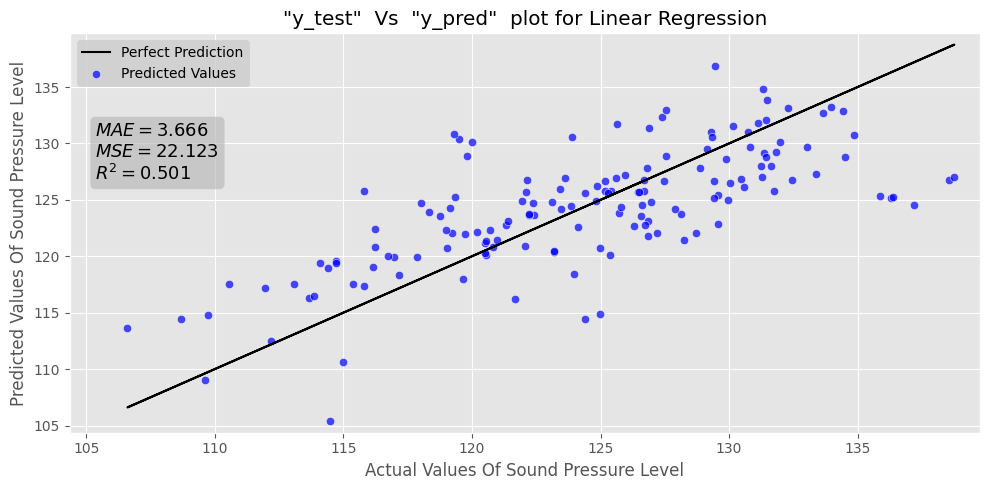

In [ ]:
# Plotting y_test vs y_pred for Linear Reagression
graph_plotter(y_test,lin_pred,'Linear Regression')

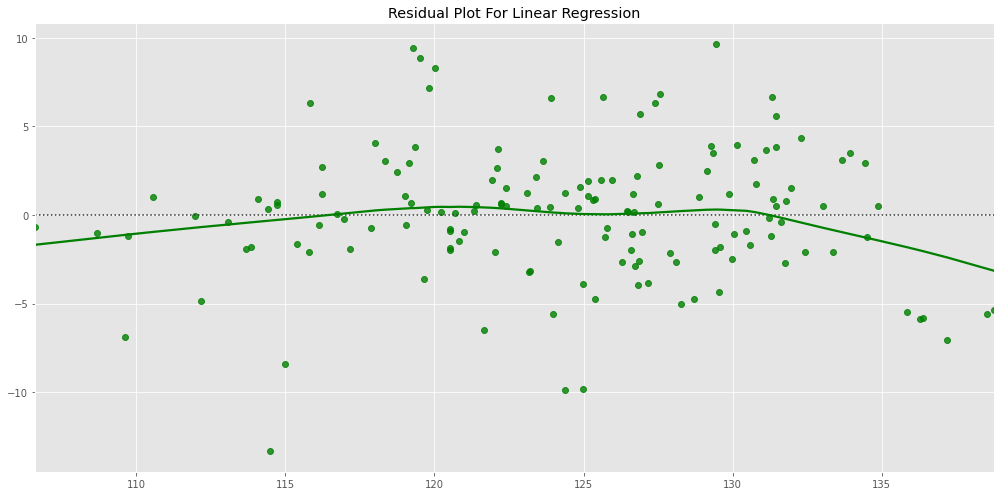

In [ ]:
# Plotting Residual Plots For Linear Regresssion Model

fig ,axis = plt.subplots(nrows=1,ncols=1,figsize=(14,7))

sns.residplot(y_test.values,lin_pred,color='g',lowess=True,ax=axis)
axis.set_title('Residual Plot For Linear Regression')
plt.tight_layout()
plt.show()

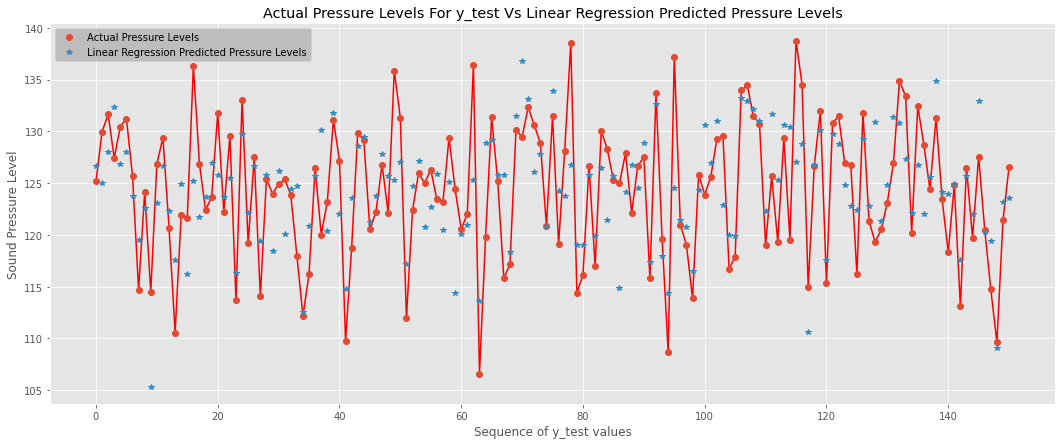

In [ ]:
# Printing The Output Values i.e Sound pressure level for y_test & lin_pred

x_value = list(range(0,X_test.shape[0]))
y_value = y_test

fig ,axis = plt.subplots(nrows=1,ncols=1,figsize=(18,7))

axis.plot(x_value,y_value,'r')
axis.plot(x_value,y_value,'o',label ='Actual Pressure Levels')
axis.plot(x_value,lin_pred,'*',label ='Linear Regression Predicted Pressure Levels')
plt.title('Actual Pressure Levels For y_test Vs Linear Regression Predicted Pressure Levels')
plt.ylabel('Sound Pressure Level')
plt.xlabel('Sequence of y_test values')
axis.legend(facecolor='0.7')
plt.show()

### Random Forest Regression Model

In [ ]:
# Creating Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 150,random_state=5) #5
rf_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=5, verbose=0, warm_start=False)

In [ ]:
# Predicting Values On X_test
rf_pred = rf_reg.predict(X_test)

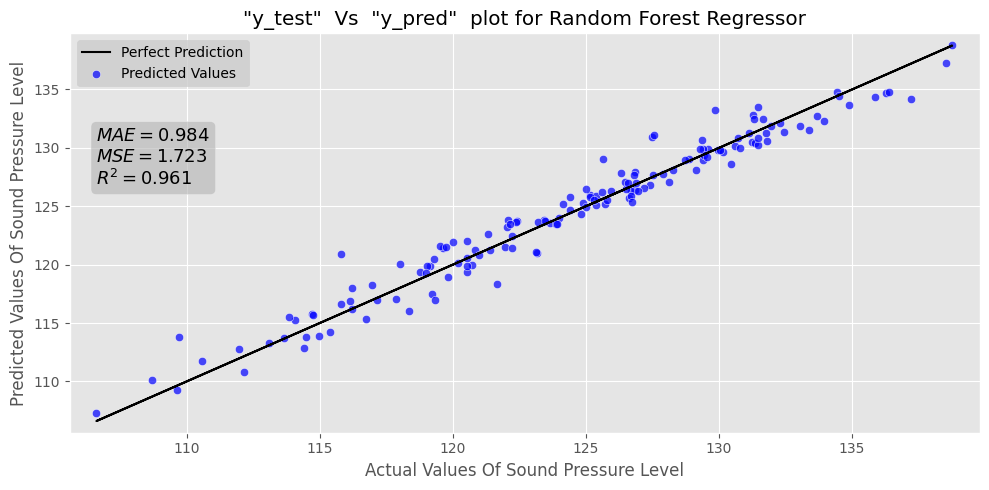

In [ ]:
# Plotting y_test vs y_pred for Random Forest Regressor
graph_plotter(y_test,rf_pred,'Random Forest Regressor')

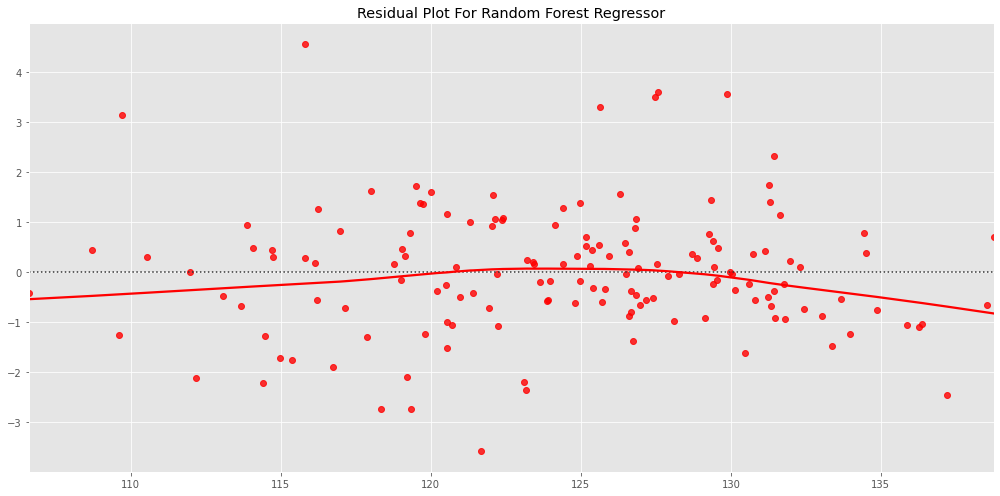

In [ ]:
# Plotting Residual Plots For Random Forest Regressor Model

fig ,axis = plt.subplots(nrows=1,ncols=1,figsize=(14,7))

sns.residplot(y_test.values,rf_pred,color='r',lowess=True,ax=axis)
axis.set_title('Residual Plot For Random Forest Regressor')
plt.tight_layout()
plt.show()

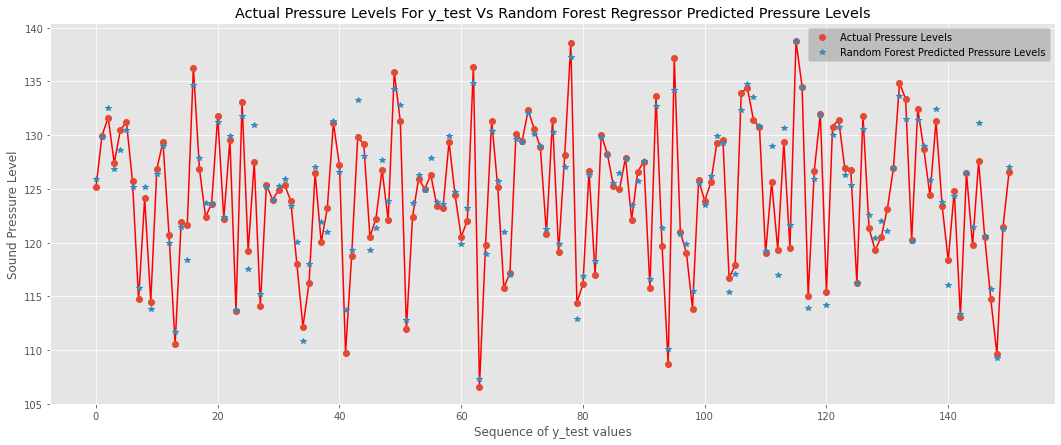

In [ ]:
# Printing The Output Values i.e Sound pressure level for y_test & rf_pred

x_value = list(range(0,X_test.shape[0]))
y_value = y_test

fig ,axis = plt.subplots(nrows=1,ncols=1,figsize=(18,7))

axis.plot(x_value,y_value,'r')
axis.plot(x_value,y_value,'o',label ='Actual Pressure Levels')
axis.plot(x_value,rf_pred,'*',label ='Random Forest Predicted Pressure Levels')
plt.title('Actual Pressure Levels For y_test Vs Random Forest Regressor Predicted Pressure Levels')
plt.ylabel('Sound Pressure Level')
plt.xlabel('Sequence of y_test values')
axis.legend(facecolor='0.7')
plt.show()

In [ ]:
# Updating model_performance DataFrame

from sklearn.metrics import mean_squared_error,r2_score,median_absolute_error
rf_list = [mean_squared_error(y_test,rf_pred),median_absolute_error(y_test,rf_pred),r2_score(y_test,rf_pred)]
model_performance['Random_Forest_Regressor'] = rf_list
model_performance

,Linear_Regression,Random_Forest_Regressor
MSE,22.123284,1.722699
MAE,2.925720,0.789947
R-Square,0.500744,0.961124


## **Analysing the performance of Linear Regression & Random Forest Regressor Model**

### Residual Plots

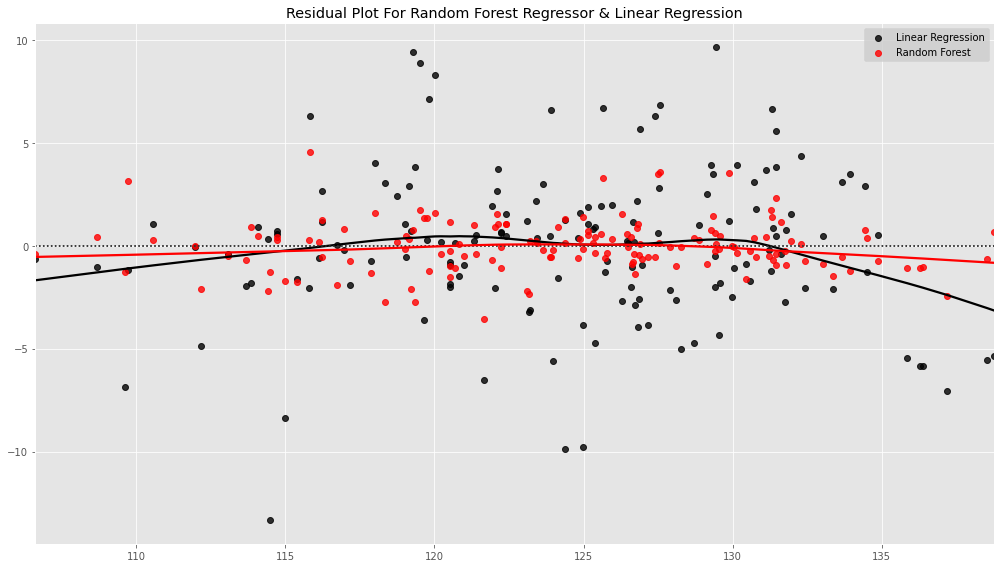

In [ ]:
# Plotting Residual Plots For Linear Regression &  Random Forest Regressor Model 

fig ,axis = plt.subplots(nrows=1,ncols=1,figsize=(14,8))

sns.residplot(y_test.values,lin_pred,color='k',lowess=True,ax=axis,label='Linear Regression')
sns.residplot(y_test.values,rf_pred,color='r',lowess=True,ax=axis,label='Random Forest')
axis.set_title('Residual Plot For Random Forest Regressor & Linear Regression')
# axis.set_ylim([-6,6])
plt.legend(facecolor = '0.8')
plt.tight_layout()
plt.show()

In [ ]:
# Data About Performance of Linear Regression & Random Forest Regressor Model
model_performance

,Linear_Regression,Random_Forest_Regressor
MSE,22.123284,1.722699
MAE,2.925720,0.789947
R-Square,0.500744,0.961124


## Conclusion -

After Seeing Residual Plots & other parameters related to model performance , we can conclude that the Random Forest Regressor Model performed far better compared to Linear Regression Model with R-Square value of 0.5 & 0.96 respectively.
